### Импортирование библиотек

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import LancasterStemmer

from string import punctuation

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
data = pd.read_csv('/content/dataset.csv')

### Предобработка данных

In [50]:
# проверяем типы
data.dtypes

Text        object
language    object
dtype: object

In [51]:
# проверяем, есть ли в данных потерянные значения
data.isnull().sum()

Text        0
language    0
dtype: int64

In [52]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [53]:
data.rename(columns = {'Text':'text'}, inplace = True)

In [54]:
# проверяем, какие языки есть в нашем датасете
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [55]:
# убираем дубликаты в наборах данных
data = data.drop_duplicates(subset = 'text')

In [56]:
# проверяем количество экземляров в данных после очистки от дубликатов
data['language'].value_counts()

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64

In [57]:
# определяем, какие слова будут запрещены
punct_signs = list(punctuation)
banned_words = stopwords.words() + punct_signs

In [58]:
# очищаем данные
def cleaning_data(text):
  tokens = word_tokenize(text)
  words = [word.lower() for word in tokens if tokens not in banned_words]
  lancaster = LancasterStemmer()
  words = [lancaster.stem(word) for word in words]
  return " ".join(words)

In [59]:
data['cleaned_text'] = data['text'].apply(cleaning_data)

In [60]:
data.head(15)

,text,language,cleaned_text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,kle gottwald surnukeh palsameerit ning paiguta...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,seb joseph pereir thoma på eng the jesuit and ...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charo krung เริ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclon en b...
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish,tsutinal i̇ngilizce tsuutin kanadad albert böl...
7,müller mox figura centralis circulorum doctoru...,Latin,müller mox figur cent circulor doctor vindobon...
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu,برقی بار elect charg تمام زیرجوہری ذرات کی ا ی...
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...


In [61]:
# переводим строки в инты
label_encoder = LabelEncoder()
data['encoded_language'] = label_encoder.fit_transform(data['language'])

### Разделение текста на обучающую и тестовую выборки

Используется векторизация Bag of Words (Count Vectorizer)


In [62]:
X = data['cleaned_text']
y = data['encoded_language']

In [63]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Создание модели

In [65]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)

MultinomialNB()

In [66]:
y_preds = MNB.predict(x_test)

In [67]:
accuracy_score(y_test, y_preds)

0.953034461726136

In [68]:
languages = sorted(list(set(data['language'])))

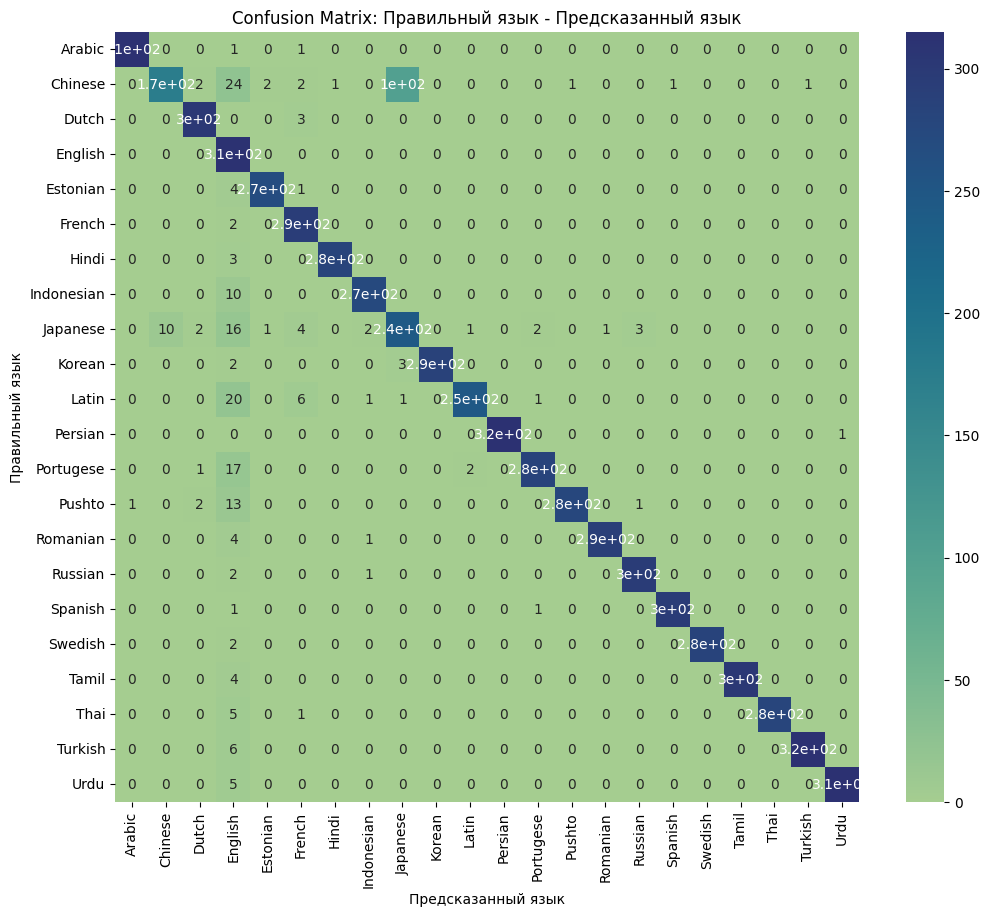

In [69]:
conf_matrix = confusion_matrix(y_test, y_preds)
data_fr = pd.DataFrame(conf_matrix, index = languages, columns = languages)
plt.figure(figsize = (12, 10))
plt.title('Confusion Matrix: Правильный язык - Предсказанный язык')
sns.heatmap(data_fr, cmap = 'crest', annot = True)
plt.xlabel('Предсказанный язык', fontsize = 10)
plt.ylabel('Правильный язык', fontsize = 10)
plt.show()

### Тестирование на новых входных данных

In [70]:
text = input()
sent = pd.Series(text)
sent = sent.apply(cleaning_data)

Python — высокоуровневый язык программирования общего назначения с динамической строгой типизацией и автоматическим управлением памятью, ориентированный на повышение производительности разработчика, читаемости кода и его качества, а также на обеспечение переносимости написанных на нём программ.


In [71]:
ans = vectorizer.transform(sent)

In [72]:
prediction = MNB.predict(ans)
languages[prediction[0]]

'Russian'